## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.tabular import *

## Train table 

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head().T

,0,1,2,3,4
id,1379560.00,1466964.00,1346989.00,1338232.00,1448490.0
week,1.00,1.00,1.00,1.00,1.0
center_id,55.00,55.00,55.00,55.00,55.0
meal_id,1885.00,1993.00,2539.00,2139.00,2631.0
checkout_price,136.83,136.83,134.86,339.50,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0.00,0.00,0.00,0.00,0.0
homepage_featured,0.00,0.00,0.00,0.00,0.0
num_orders,177.00,270.00,189.00,54.00,40.0


In [5]:
min(train_df['emailer_for_promotion']),max(train_df['emailer_for_promotion'])

(0, 1)

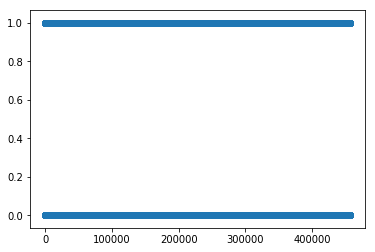

In [6]:
plt.scatter(range(0,456548),train_df['emailer_for_promotion'])

In [7]:
len(train_df)

456548

## Test table
file can be changed here for private test set

In [8]:
test_df = pd.read_csv('test_QoiMO9B.csv')

In [9]:
test_df.head().T

,0,1,2,3,4
id,1028232.00,1127204.00,1212707.00,1082698.00,1400926.00
week,146.00,146.00,146.00,146.00,146.00
center_id,55.00,55.00,55.00,55.00,55.00
meal_id,1885.00,1993.00,2539.00,2631.00,1248.00
checkout_price,158.11,160.11,157.14,162.02,163.93
base_price,159.11,159.11,159.14,162.02,163.93
emailer_for_promotion,0.00,0.00,0.00,0.00,0.00
homepage_featured,0.00,0.00,0.00,0.00,0.00


In [10]:
len(test_df)

32573

## Other tables

In [11]:
fci_df = pd.read_csv('fulfilment_center_info.csv')

In [12]:
fci_df.head().T

,0,1,2,3,4
center_id,11,13,124,66,94
city_code,679,590,590,648,632
region_code,56,56,56,34,34
center_type,TYPE_A,TYPE_B,TYPE_C,TYPE_A,TYPE_C
op_area,3.7,6.7,4,4.1,3.6


In [13]:
len(fci_df)

77

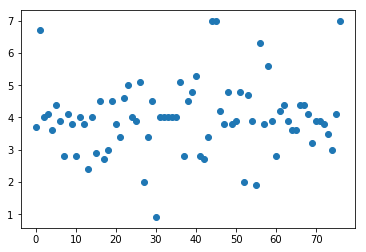

In [14]:
plt.scatter(range(0,77),fci_df['op_area'])

In [15]:
mi_df= pd.read_csv('meal_info.csv')

In [16]:
mi_df.head().T

,0,1,2,3,4
meal_id,1885,1993,2539,1248,2631
category,Beverages,Beverages,Beverages,Beverages,Beverages
cuisine,Thai,Thai,Thai,Indian,Indian


In [17]:
len(mi_df)

51

## Left join of the tables

In [18]:
train_fci = train_df.merge(fci_df, how='left', left_on='center_id', right_on='center_id')
test_fci = test_df.merge(fci_df, how='left', left_on='center_id', right_on='center_id')

In [19]:
train_fci.head().T

,0,1,2,3,4
id,1379560,1466964,1346989,1338232,1448490
week,1,1,1,1,1
center_id,55,55,55,55,55
meal_id,1885,1993,2539,2139,2631
checkout_price,136.83,136.83,134.86,339.5,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0,0,0,0,0
homepage_featured,0,0,0,0,0
num_orders,177,270,189,54,40
city_code,647,647,647,647,647


In [20]:
len(train_fci),len(test_fci)

(456548, 32573)

In [21]:
train_fci_mi = train_fci.merge(mi_df, how='left', left_on='meal_id', right_on='meal_id')
test_fci_mi = test_fci.merge(mi_df, how='left', left_on='meal_id', right_on='meal_id')

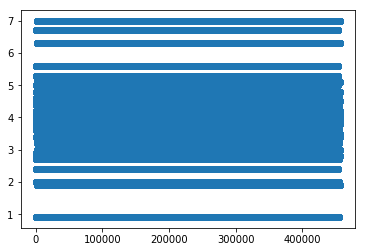

In [22]:
plt.scatter(range(0,456548),train_fci_mi['op_area'])

In [23]:
len(train_fci_mi),len(test_fci_mi)

(456548, 32573)

In [43]:
att = train_fci_mi.columns
len(att),att[8]

(15, 'num_orders')

## Looking at the relation

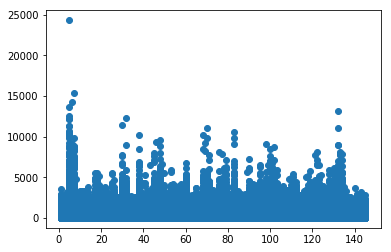

In [44]:
plt.scatter(train_fci_mi[att[1]],train_fci_mi['num_orders'])

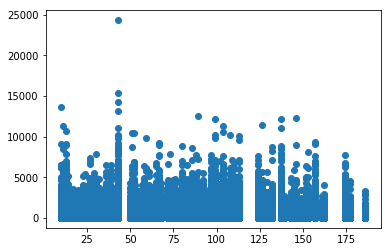

In [45]:
plt.scatter(train_fci_mi[att[2]],train_fci_mi['num_orders'])

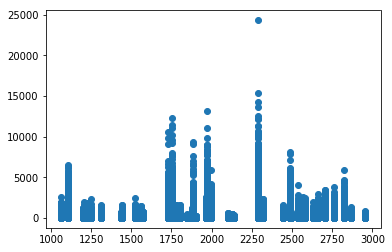

In [46]:
plt.scatter(train_fci_mi[att[3]],train_fci_mi['num_orders'])

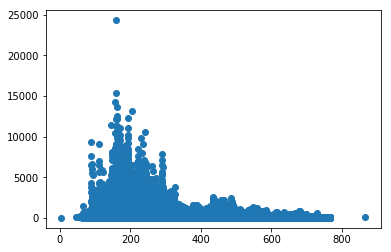

In [47]:
plt.scatter(train_fci_mi[att[4]],train_fci_mi['num_orders'])

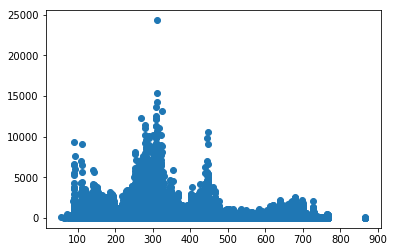

In [48]:
plt.scatter(train_fci_mi[att[5]],train_fci_mi['num_orders'])

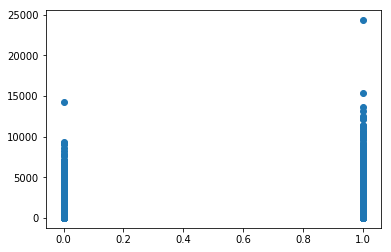

In [49]:
plt.scatter(train_fci_mi[att[6]],train_fci_mi['num_orders'])

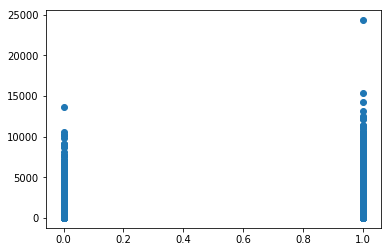

In [50]:
plt.scatter(train_fci_mi[att[7]],train_fci_mi['num_orders'])

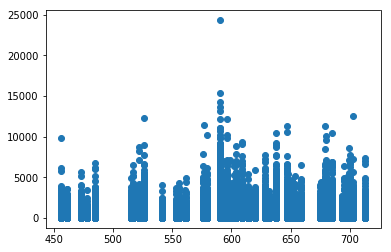

In [51]:
plt.scatter(train_fci_mi[att[9]],train_fci_mi['num_orders'])

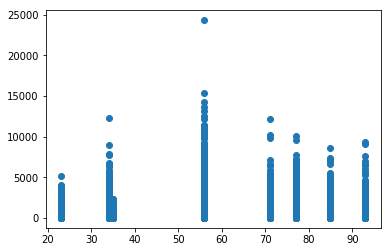

In [52]:
plt.scatter(train_fci_mi[att[10]],train_fci_mi['num_orders'])

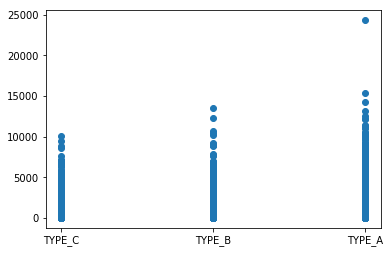

In [53]:
plt.scatter(train_fci_mi[att[11]],train_fci_mi['num_orders'])

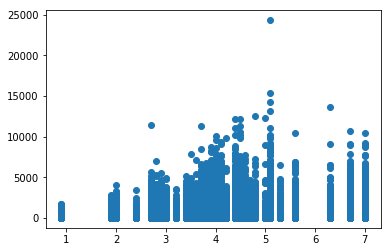

In [54]:
plt.scatter(train_fci_mi[att[12]],train_fci_mi['num_orders'])

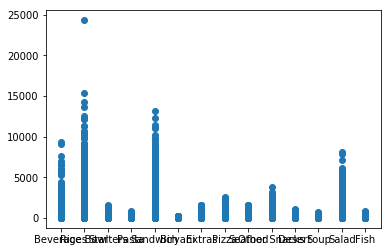

In [55]:
plt.scatter(train_fci_mi[att[13]],train_fci_mi['num_orders'])

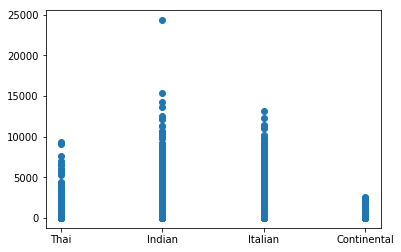

In [56]:
plt.scatter(train_fci_mi[att[14]],train_fci_mi['num_orders'])

## Checking for correct merge

In [57]:
train_fci_mi.head().T

,0,1,2,3,4
id,1379560,1466964,1346989,1338232,1448490
week,1,1,1,1,1
center_id,55,55,55,55,55
meal_id,1885,1993,2539,2139,2631
checkout_price,136.83,136.83,134.86,339.5,243.5
base_price,152.29,135.83,135.86,437.53,242.5
emailer_for_promotion,0,0,0,0,0
homepage_featured,0,0,0,0,0
num_orders,177,270,189,54,40
city_code,647,647,647,647,647


In [127]:
test_fci_mi

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,42,55,1885,-1.139282,-1.209352,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,42,55,1993,-1.126230,-1.209352,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,42,55,2539,-1.145612,-1.209166,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,42,55,2631,-1.113765,-1.191361,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,42,55,1248,-1.101300,-1.179552,0,0,647,56,TYPE_C,2.0,Beverages,Indian
5,1284113,42,55,1778,-0.930188,-1.017445,0,0,647,56,TYPE_C,2.0,Beverages,Italian
6,1197966,42,55,1062,-0.924054,-1.005451,0,0,647,56,TYPE_C,2.0,Beverages,Italian
7,1132739,42,55,2707,-0.588160,-0.705782,0,0,647,56,TYPE_C,2.0,Beverages,Italian
8,1057981,42,55,1207,0.184128,0.038227,0,0,647,56,TYPE_C,2.0,Beverages,Continental
9,1095932,42,55,1230,0.329527,0.182157,0,0,647,56,TYPE_C,2.0,Beverages,Continental


## Preprocessing 
* fill missing
* Categorify the data categories
* Normalize
* As weeks was continous numbers modulous of 52 would give better insight for seasonality

In [59]:
procs=[FillMissing, Categorify, Normalize]

In [60]:
train_fci_mi['week'] = train_fci_mi['week']%52
test_fci_mi['week'] = test_fci_mi['week']%52

## Segregating categorical and continous variabes also target

In [69]:
cat_vars = ['week', 'city_code', 'region_code','op_area','meal_id','center_id', 'center_type', 'category', 'cuisine', 'emailer_for_promotion', 'homepage_featured']
cont_vars = ['checkout_price', 'base_price']
dep_var = ['num_orders']

In [70]:
df = train_fci_mi[cat_vars + cont_vars + dep_var].copy()

## Validation Range

In [71]:
val_cut = range(int(.1*len(train_df)))

## Preparing list

In [72]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(val_cut)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                    .add_test(ItemList.from_df(test_fci_mi))
                   .databunch())

## range of values slighty added coz of sigmoid

In [129]:
max_log_y = np.log(np.max(train_df['num_orders'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

## Metric root mean square log error

In [81]:
def rmsle(pred:FloatTensor, targ:FloatTensor)->Rank0Tensor:
    "Exp RMSE between `pred` and `targ`."
    assert pred.numel() == targ.numel(), "Expected same numbers of elements in pred & targ"
    if len(pred.shape)==2: pred=pred.squeeze(1)
    pct_var = torch.log((pred+1)/(targ+1))
    return torch.sqrt((pct_var**2).mean())*100

## Learner with full connected network for continous varibale and embeddings for categorical variables

In [92]:
learn = tabular_learner(data, layers=[500,200], ps=[0.1,0.1], emb_drop=0.2, 
                        y_range=y_range, metrics=[rmsle,exp_rmspe])

In [93]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(53, 15)
    (1): Embedding(52, 15)
    (2): Embedding(9, 5)
    (3): Embedding(31, 11)
    (4): Embedding(52, 15)
    (5): Embedding(78, 18)
    (6): Embedding(4, 3)
    (7): Embedding(15, 7)
    (8): Embedding(5, 4)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.2)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=101, out_features=500, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
    (4): Linear(in_features=500, out_features=200, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=200, out_features=1, bias=True)
  )
)

## Looking for apt LR

In [94]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


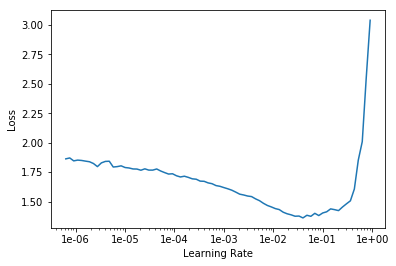

In [95]:
learn.recorder.plot()

## Training

In [96]:
learn.fit_one_cycle(5, 3e-4, wd=0.2)

epoch,train_loss,valid_loss,rmsle,exp_rmspe
1,0.362233,0.338783,11.006934,0.845434
2,0.324291,0.327673,10.821405,0.867964
3,0.314295,0.323149,10.819282,0.911162
4,0.285635,0.323191,10.710593,0.782686
5,0.289757,0.320646,10.690928,0.805766


In [97]:
learn.fit_one_cycle(5, 3e-5)

epoch,train_loss,valid_loss,rmsle,exp_rmspe
1,0.292178,0.321744,10.736247,0.853881
2,0.290060,0.320912,10.727388,0.850803
3,0.284002,0.320816,10.712082,0.820924
4,0.277904,0.318747,10.707828,0.865647
5,0.269381,0.322301,10.708161,0.780298


In [124]:
learn.load('all3weekmod0.1500200')

Learner(data=TabularDataBunch;

Train: LabelList
y: FloatList (410894 items)
[FloatItem 5.736572297479192, FloatItem 5.863631175598097, FloatItem 4.394449154672439, FloatItem 5.003946305945459, FloatItem 4.406719247264253]...
Path: .
x: TabularList (410894 items)
[TabularLine week 16; city_code 473; region_code 77; op_area 4.5; meal_id 1062; center_id 61; center_type TYPE_A; category Beverages; cuisine Italian; emailer_for_promotion 0; homepage_featured 0; checkout_price -1.0127; base_price -1.0832; , TabularLine week 16; city_code 473; region_code 77; op_area 4.5; meal_id 2707; center_id 61; center_type TYPE_A; category Beverages; cuisine Italian; emailer_for_promotion 0; homepage_featured 0; checkout_price -0.9237; base_price -1.0236; , TabularLine week 16; city_code 473; region_code 77; op_area 4.5; meal_id 1207; center_id 61; center_type TYPE_A; category Beverages; cuisine Continental; emailer_for_promotion 0; homepage_featured 0; checkout_price -0.0817; base_price -0.2137; , Tabul

## Predictions

In [125]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
key_ids = test_df['id']
out = pd.DataFrame({'id': key_ids, 'num_orders': np.exp(preds.numpy()[:,0])})

In [126]:
out

,id,num_orders
0,1028232,180.607346
1,1127204,193.797592
2,1212707,116.030586
3,1082698,42.932751
4,1400926,33.976288
5,1284113,179.684860
6,1197966,186.828171
7,1132739,190.003525
8,1057981,99.459450
9,1095932,84.345924


In [121]:
learn.save('all3weekmod0.1500200')

In [122]:
out.to_csv('all3weekmod.1500200.csv', index=False)